Chenrui Zhao





# Preparation

## Choose and explain what metric(s) you will use to evaluate your algorithm's performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.

### Metrics

We have decided to use F1-scores and ROC-AUC to evaluate the performance of our models.

As reported in the article [F-score](https://en.wikipedia.org/wiki/F-score) from wikipedia.org the F1-score provided is calculated from both percison and recall. Percision and recall are important metrics for classification tasks as reported in [Metrics to Evaluate your Classification Model to take the Right Decisions](https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions/) by Sumeet Kumar in www.analyticsvidhya.com (Nov 27, 2024). Precision measures the proportion of true positive predictions among all positive predictions, while recall measures the proportion of true positive predictions among all actual positives. The F1-score combines these two metrics, ensuring that both false positives and false negatives are taken into account. This is crucial for tasks where both types of errors are important.

ROC-AUC is a robust metric for comparing different models. A higher AUC indicates better model performance in distinguishing between classes. This is valuable for selecting the best model among several candidates.

Using the F1-score and ROC-AUC together provides a comprehensive evaluation of your model's performance. The F1-score ensures that both precision and recall are considered, making it suitable for imbalanced datasets and applications where both types of errors are critical. ROC-AUC offers a threshold-independent measure of the model's discriminative ability, useful for comparing models and understanding their performance across different thresholds. Together, these metrics provide a robust framework for evaluating and selecting the best model for our task.

## Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Convince me that your cross validation method is a realistic mirroring of how an algorithm would be used in practice.

### Splitting Data

We have selected the Train-Validation-Test Split for our model. With this method, we will simply split the data into a training set and a testing set. Once the model is trained on the training set, it will be applied to the test set (data it has never seen) to predict the classifications of each test instance. This method is widely used during the development of models. It is practical for this exercise because training the model is computationally expensive. Methods like shuffle split or stratified shuffle split would be too time-consuming. However, these methods could be applied later in the development process to further validate the effectiveness of the models.

In [17]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load CIFAR-10 dataset this data already has a 80/20 split
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Print the shapes of the datasets to verify the splits
print(f'Training set: {x_train.shape}, {y_train.shape}')
print(f'Test set: {x_test.shape}, {y_test.shape}')

NUM_CLASSES = 10

# Convert labels to one-hot encoding
# taken from https://github.com/eclarson/MachineLearningNotebooks/blob/master/11.%20Convolutional%20Neural%20Networks.ipynb

y_train_ohe = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test_ohe = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

Training set: (50000, 32, 32, 3), (50000, 1)
Test set: (10000, 32, 32, 3), (10000, 1)


# Modeling

## Setup the training to use data expansion in Keras (also called data augmentation). Explain why the chosen data expansion techniques are appropriate for your dataset. You should make use of Keras augmentation layers, like in the class examples.

### Data Augmentation Exlanation

Data augmentation is appropriate for the CIFAR-10 dataset. Because CIFAR-10 is a relatively small dataset (50,000 instances in the training set), data augmentation can prevent overfitting by increasing the diversity of the training data. This will improve the model's generalization. The methods employed are a random horizontal flip and a random rotation of up to 20%. These augmentations will provide appropriate variations in the images while not making them unrecognizable.

## Create a convolutional neural network to use on your data using Keras. Investigate at least two different convolutional network architectures and investigate changing one or more parameters of each architecture such as the number of filters. This means, at a  minimum, you will train a total of four models (2 different architectures, with 2 parameters changed in each architecture). Use the method of train/test splitting and evaluation metric that you argued for at the beginning of the lab. Visualize the performance of the training and validation sets per iteration (use the "history" parameter of Keras). Be sure that models converge.

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import RandomFlip, RandomRotation

# apdapted from https://github.com/eclarson/MachineLearningNotebooks/blob/master/11.%20Convolutional%20Neural%20Networks.ipynb
def create_simple_cnn(filters):
    model = Sequential([
        RandomFlip("horizontal"),
        RandomRotation(0.2),
        Conv2D(filters=filters, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(filters=filters*2, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_deeper_cnn(filters):
    model = Sequential([
        RandomFlip("horizontal"),
        RandomRotation(0.2),
        Conv2D(filters=filters, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
        Conv2D(filters=filters, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(filters=filters*2, kernel_size=(3, 3), activation='relu'),
        Conv2D(filters=filters*2, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [19]:
import matplotlib.pyplot as plt

# apdapted from https://github.com/eclarson/MachineLearningNotebooks/blob/master/11.%20Convolutional%20Neural%20Networks.ipynb
def plot_history(history, model_name):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.suptitle(model_name)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

In [20]:
simple_model_A = create_simple_cnn(32)
simple_model_B = create_simple_cnn(64)

deeper_model_A = create_deeper_cnn(32)
deeper_model_B = create_deeper_cnn(64)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 94ms/step - accuracy: 0.2723 - loss: 1.9768 - val_accuracy: 0.4561 - val_loss: 1.5205
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step - accuracy: 0.4038 - loss: 1.6613 - val_accuracy: 0.4969 - val_loss: 1.4023
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 95ms/step - accuracy: 0.4356 - loss: 1.5749 - val_accuracy: 0.5034 - val_loss: 1.3917
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 92ms/step - accuracy: 0.4627 - loss: 1.5013 - val_accuracy: 0.5365 - val_loss: 1.2996
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 95ms/step - accuracy: 0.4814 - loss: 1.4560 - val_accuracy: 0.5509 - val_loss: 1.2722


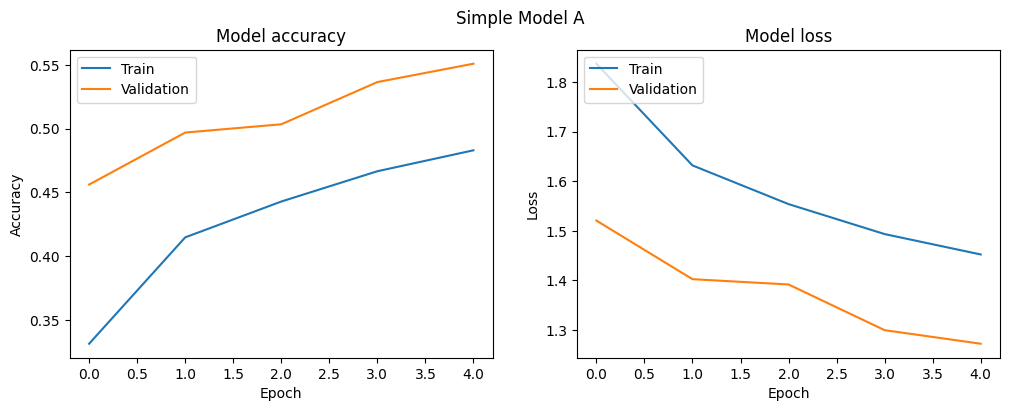

In [21]:
simple_model_hx_A = simple_model_A.fit(x_train, y_train_ohe, epochs=5, validation_data=(x_test, y_test_ohe), batch_size=64)
plot_history(simple_model_hx_A, "Simple Model A")

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 162s 205ms/step - accuracy: 0.2769 - loss: 1.9688 - val_accuracy: 0.4595 - val_loss: 1.5454
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 257s 275ms/step - accuracy: 0.4174 - loss: 1.6382 - val_accuracy: 0.5163 - val_loss: 1.3499
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 217s 218ms/step - accuracy: 0.4579 - loss: 1.5276 - val_accuracy: 0.5571 - val_loss: 1.2665
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 162s 207ms/step - accuracy: 0.4737 - loss: 1.4709 - val_accuracy: 0.5634 - val_loss: 1.2067
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 159s 204ms/step - accuracy: 0.4991 - loss: 1.4109 - val_accuracy: 0.5759 - val_loss: 1.2089


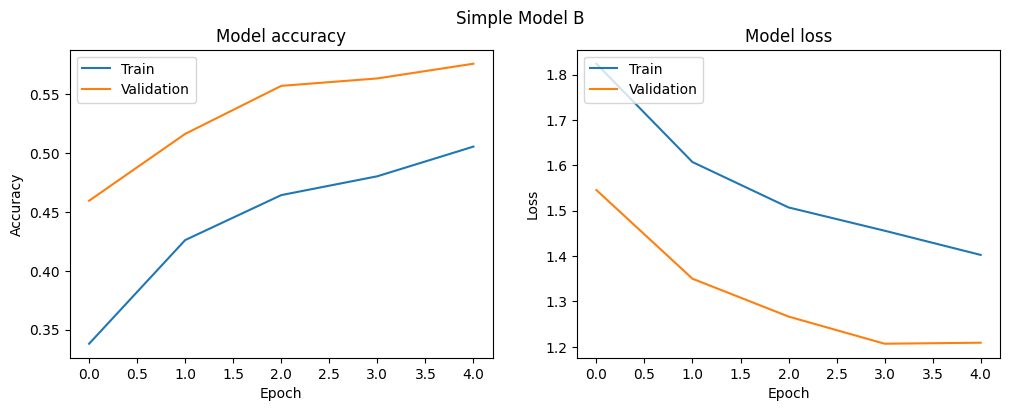

In [22]:
simple_model_hx_B = simple_model_B.fit(x_train, y_train_ohe, epochs=5, validation_data=(x_test, y_test_ohe), batch_size=64)
plot_history(simple_model_hx_B, "Simple Model B")

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 192s 242ms/step - accuracy: 0.2839 - loss: 1.9370 - val_accuracy: 0.4249 - val_loss: 1.5880
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 191s 228ms/step - accuracy: 0.4230 - loss: 1.6058 - val_accuracy: 0.4916 - val_loss: 1.4427
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 175s 224ms/step - accuracy: 0.4824 - loss: 1.4412 - val_accuracy: 0.5203 - val_loss: 1.3488
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 196s 251ms/step - accuracy: 0.5245 - loss: 1.3428 - val_accuracy: 0.5680 - val_loss: 1.2023
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 182s 225ms/step - accuracy: 0.5499 - loss: 1.2650 - val_accuracy: 0.5698 - val_loss: 1.1823


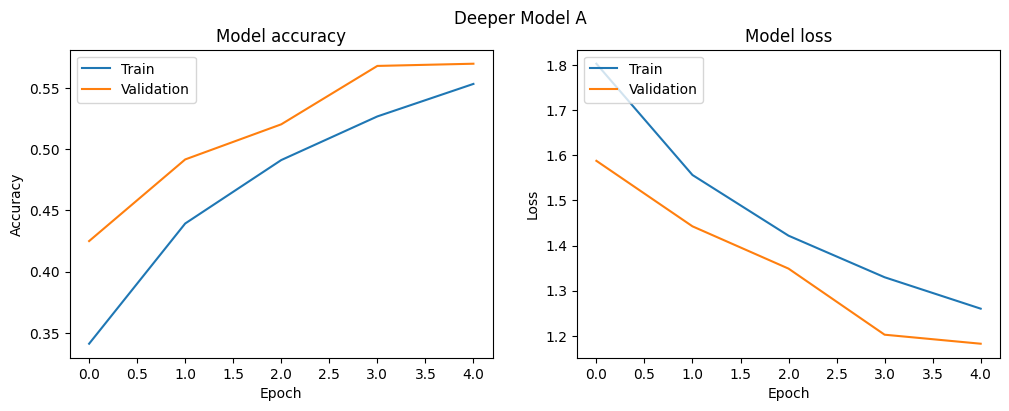

In [23]:
deeper_model_hx_A = deeper_model_A.fit(x_train, y_train_ohe, epochs=5, validation_data=(x_test, y_test_ohe), batch_size=64)
plot_history(deeper_model_hx_A, "Deeper Model A")

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 495s 630ms/step - accuracy: 0.2741 - loss: 1.9617 - val_accuracy: 0.4152 - val_loss: 1.5916
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 530s 666ms/step - accuracy: 0.4104 - loss: 1.6220 - val_accuracy: 0.4996 - val_loss: 1.3716
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 509s 651ms/step - accuracy: 0.4804 - loss: 1.4395 - val_accuracy: 0.5557 - val_loss: 1.2167
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 543s 628ms/step - accuracy: 0.5340 - loss: 1.3091 - val_accuracy: 0.5958 - val_loss: 1.1286
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 491s 628ms/step - accuracy: 0.5659 - loss: 1.2296 - val_accuracy: 0.6213 - val_loss: 1.0680


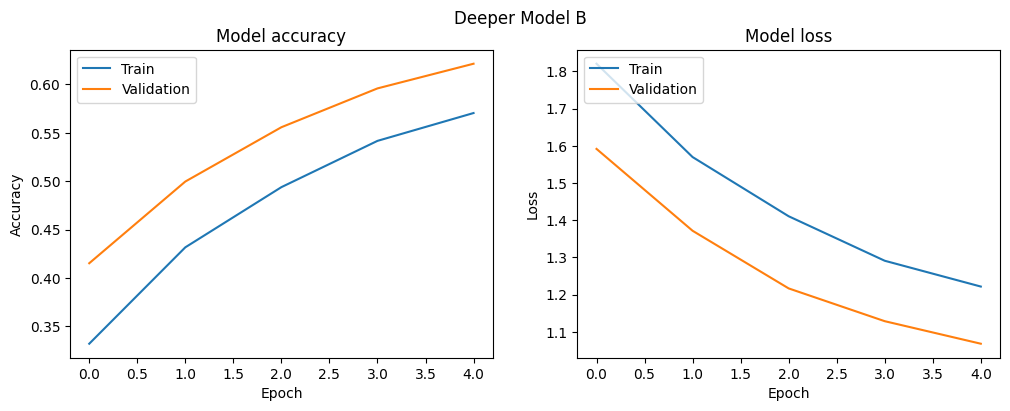

In [24]:
deeper_model_A_hx_B = deeper_model_B.fit(x_train, y_train_ohe, epochs=5, validation_data=(x_test, y_test_ohe), batch_size=64)
plot_history(deeper_model_A_hx_B, "Deeper Model B")

## Visualize the final results of all the CNNs and interpret/compare the performances. Use proper statistics as appropriate, especially for comparing models.

In [27]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# adapted from https://github.com/eclarson/MachineLearningNotebooks/blob/master/11.%20Convolutional%20Neural%20Networks.ipynb
def compare_models(models, X_test, y_test, labels='auto'):
    num_models = len(models)
    num_rows = (num_models + 1) // 2  # Calculate the number of rows needed (2 charts per row)

    plt.figure(figsize=(15, 5 * num_rows))

    for i, (model, model_name) in enumerate(models):
        predictions = model.predict(X_test)
        yhat = np.argmax(predictions, axis=1)
        yhat_probs = model.predict_proba(X_test) if hasattr(model, "predict_proba") else predictions
        acc = mt.accuracy_score(y_test, yhat)
        f1 = mt.f1_score(y_test, yhat, average='weighted')
        roc_auc = mt.roc_auc_score(y_test, yhat_probs, multi_class='ovr')

        plt.subplot(num_rows, 2, i + 1)
        cm = mt.confusion_matrix(y_test, yhat)
        cm = cm / np.sum(cm, axis=1)[:, np.newaxis]
        sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels)
        plt.title(f'{model_name}\nAccuracy: {acc:.4f}\nF1-Score: {f1:.4f}\nROC-AUC: {roc_auc:.4f}')

    plt.tight_layout()
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step


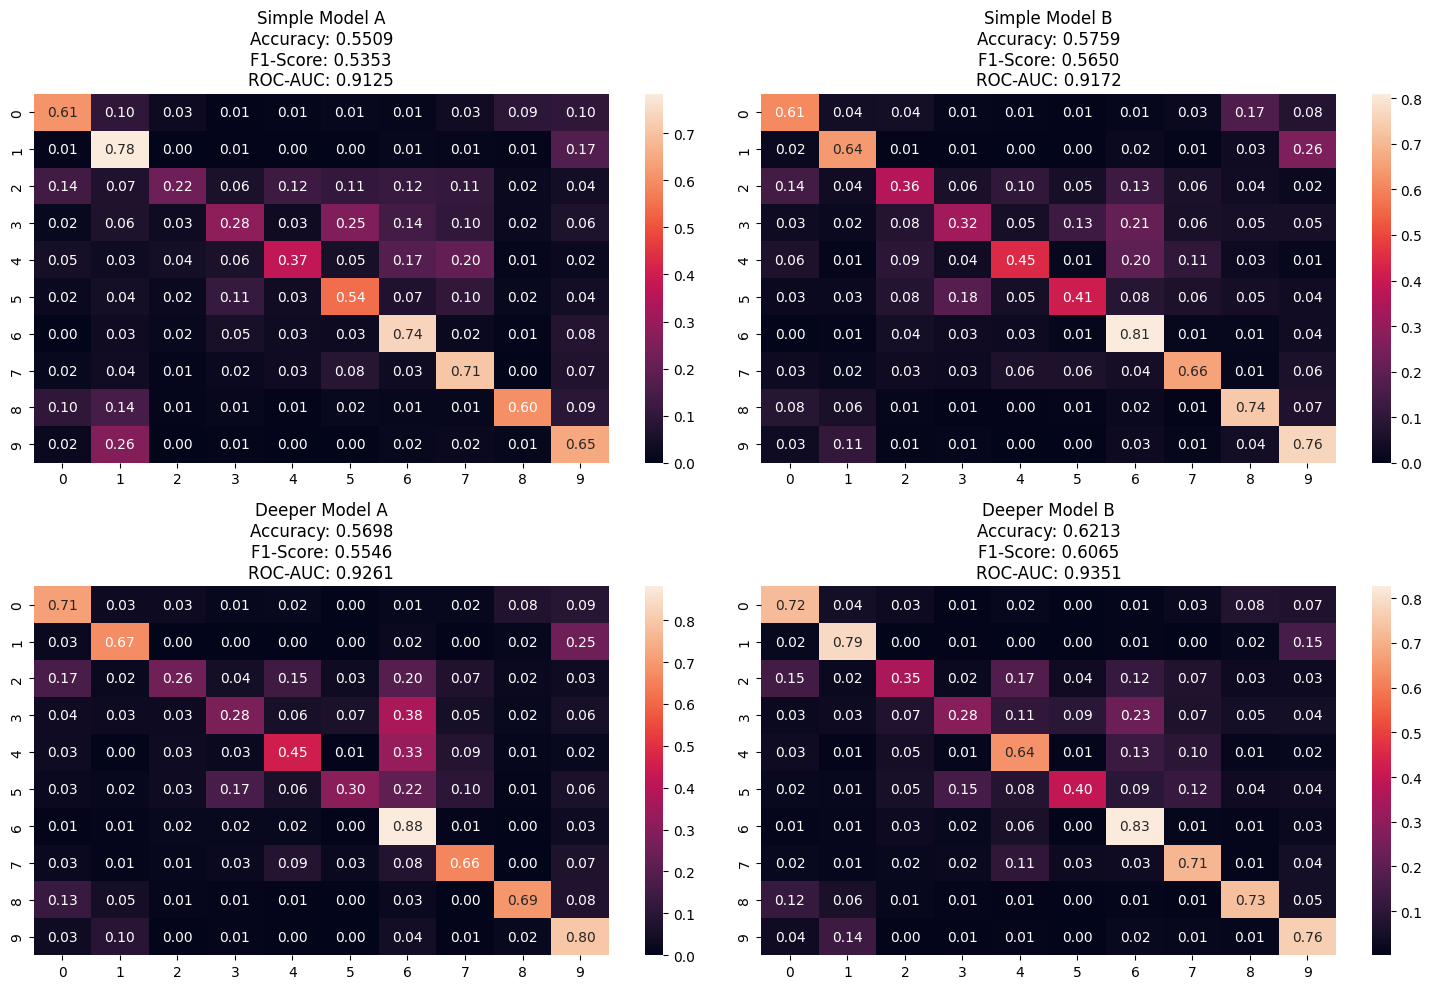

In [28]:
compare_models([(simple_model_A, "Simple Model A"),(simple_model_B, "Simple Model B"),(deeper_model_A, "Deeper Model A"),(deeper_model_B, "Deeper Model B")], x_test, y_test)

### Comparing Models

To do

## Compare the performance of your convolutional network to a standard multi-layer perceptron (MLP) using the receiver operating characteristic and area under the curve. Use proper statistical comparison techniques.

In [29]:
def create_mlp():
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

mlp = create_mlp()
mlp_history = mlp.fit(x_train, y_train_ohe, epochs=5, validation_data=(x_test, y_test_ohe), batch_size=64)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 34ms/step - accuracy: 0.2678 - loss: 2.0105 - val_accuracy: 0.3685 - val_loss: 1.7427
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.3828 - loss: 1.7027 - val_accuracy: 0.4176 - val_loss: 1.6340
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.4270 - loss: 1.5995 - val_accuracy: 0.4420 - val_loss: 1.5461
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.4477 - loss: 1.5407 - val_accuracy: 0.4515 - val_loss: 1.5410
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - accuracy: 0.4629 - loss: 1.4971 - val_accuracy: 0.4591 - val_loss: 1.5371


313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 87ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


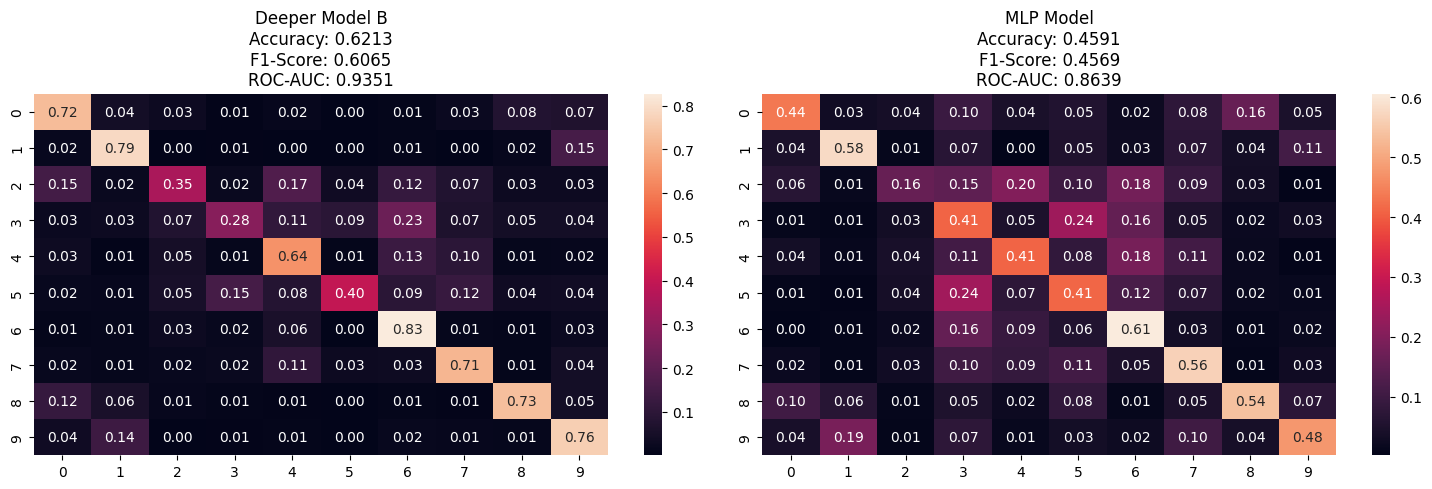

In [30]:
compare_models([(deeper_model_B, "Deeper Model B"), (mlp, "MLP Model")], x_test, y_test)

# Exceptional Work

## Use transfer learning with pre-trained weights for your initial layers of your CNN. Compare the performance when using transfer learning to your best model from above in terms of classification performance.